In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from read_all_spec import read_all_spec
from readspectrum_combinedspec import readspectrum_combinedspec
from rebin import rebin
direc = './spectra'
specfiles, polfiles = read_all_spec(direc)
#create the array for the wavelength and frequency
c = 2.99792458e+18 # angstroms/s
redshift = 0.435 # for 1222+216 
#read in the first spectrum to get the length
(fspec, ferr, fend, fheader, fmjd) = readspectrum_combinedspec(specfiles[0])
(pspec, perr, pend, pheader, pmjd) = readspectrum_combinedspec(polfiles[0])
wavend = fend*4.0 + 4000.0
wave = np.linspace(4000.0, wavend,fend)
restwave = wave/(1.0+redshift)
restnu = c/restwave
nuspec = np.float64((fspec/c)*np.power(restwave,2))
#create a dataframe so that all spectra can be read into it
#make one for polarized flux as well
d = {'wl': restwave.tolist(), str(fmjd)+'_fl': fspec.tolist()}
p = {'wl': restwave.tolist(), str(pmjd)+'_pfl': pspec.tolist()}

for i in range(1, len(specfiles)):
    (fspec, ferr, fend, fheader, fmjd) = readspectrum_combinedspec(specfiles[i])
    (pspec, perr, pend, pheader, pmjd) = readspectrum_combinedspec(polfiles[i])
    if fspec.shape != restwave.shape:
        fspec = rebin(fspec, restwave.shape)
    if pspec.shape != restwave.shape:
        pspec = rebin(pspec, restwave.shape)
    d.update({str(fmjd)+'_fl': fspec.tolist()})
    p.update({str(pmjd)+'_pfl': pspec.tolist()})

flux_df = df(data = d)
pol_df = df(data = p)


<IPython.core.display.Javascript object>


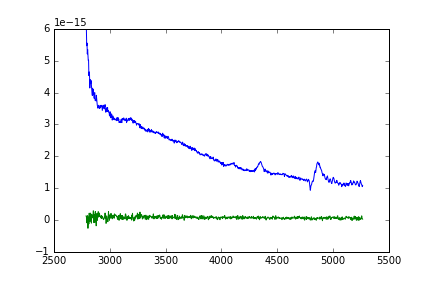

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib nbagg
plt.plot(flux_df['wl'], flux_df[flux_df.columns[1]])
plt.plot(pol_df['wl'], pol_df[pol_df.columns[1]])

In [7]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

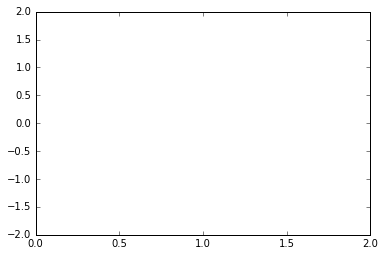

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [9]:
def init():
    line.set_data([], [])
    return (line,)


In [10]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [15]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [16]:
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])



/usr/lib/python2.7/dist-packages/matplotlib/animation.py:782: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [22]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
display_animation(anim)

NameError: global name 'anim_to_html' is not defined

In [5]:
from spectra_df import spectra_df

SyntaxError: 'return' outside function (spectra_df.py, line 39)

In [6]:
fframe, pframe = spectra_df('./spectra')

NameError: name 'spectra_df' is not defined